#IMPORTING IMPORTANT LIBRARIES

In [73]:
import pandas as pd
mushroom=pd.read_csv('/content/mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


1. here 'mushroom' is our detaframe

#DATA ANALYSIS AND PRE-PROCESSING

In [74]:
mushroom.shape

(8124, 23)

1. 8124 no of entries and 23 no of features
2. there are only 1 target feature among the 23 features and remained 22 features are input features

In [75]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

1. here all the data in every columns are object data type.
2. and there are no nan values.

In [76]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

no nan value are present

In [77]:
y=mushroom.columns
y

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

to see how many columns are present,we just creating a list with all the columns

In [78]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in y:
  mushroom[(i)]= label_encoder.fit_transform(mushroom[(i)]) 
  
mushroom[i].unique()

array([5, 1, 3, 0, 4, 6, 2])

1. as all the features are object type data,so we have to encode it in to integer or float or boolean data type
2. using label encoding we convert all the features to integer dtype

In [79]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


so here we get all the features with integer data type

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

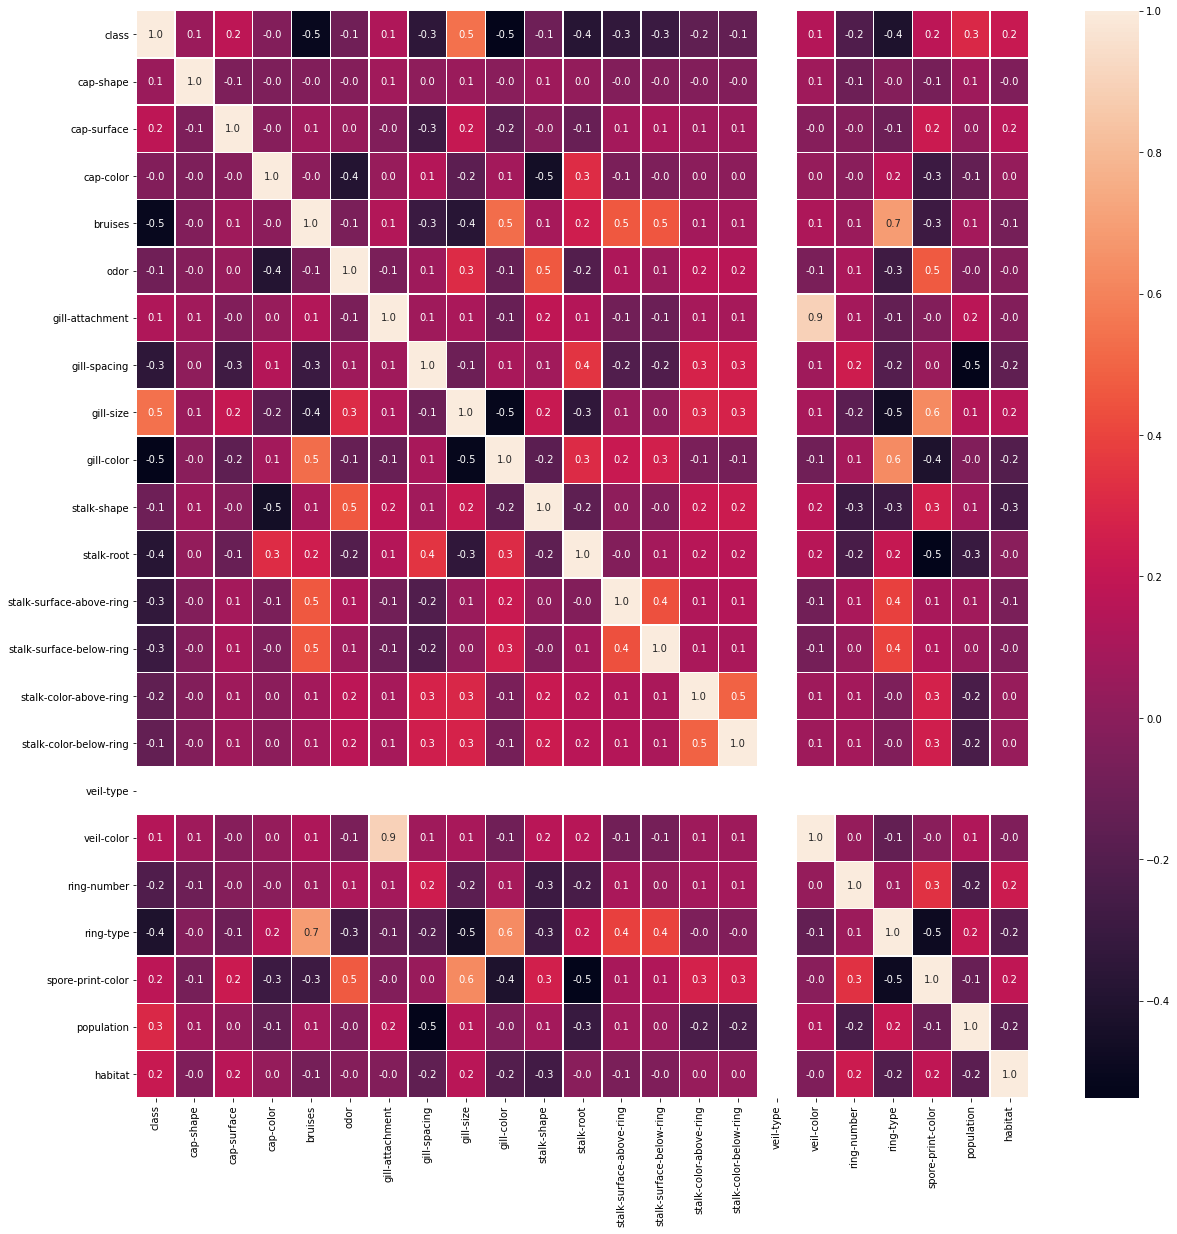

In [81]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(mushroom.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

1. this is a heat map which represents the correlation between all the features
2. here we take 'class' as a target feature
2. when the correlation between the 2 input features is high but the correlation between the input features and target feature is low then it is called multi-colinearility

In [82]:
mushroom=mushroom.drop(['veil-type'],axis=1)

we drop the feature 'veil-type' as there are no data

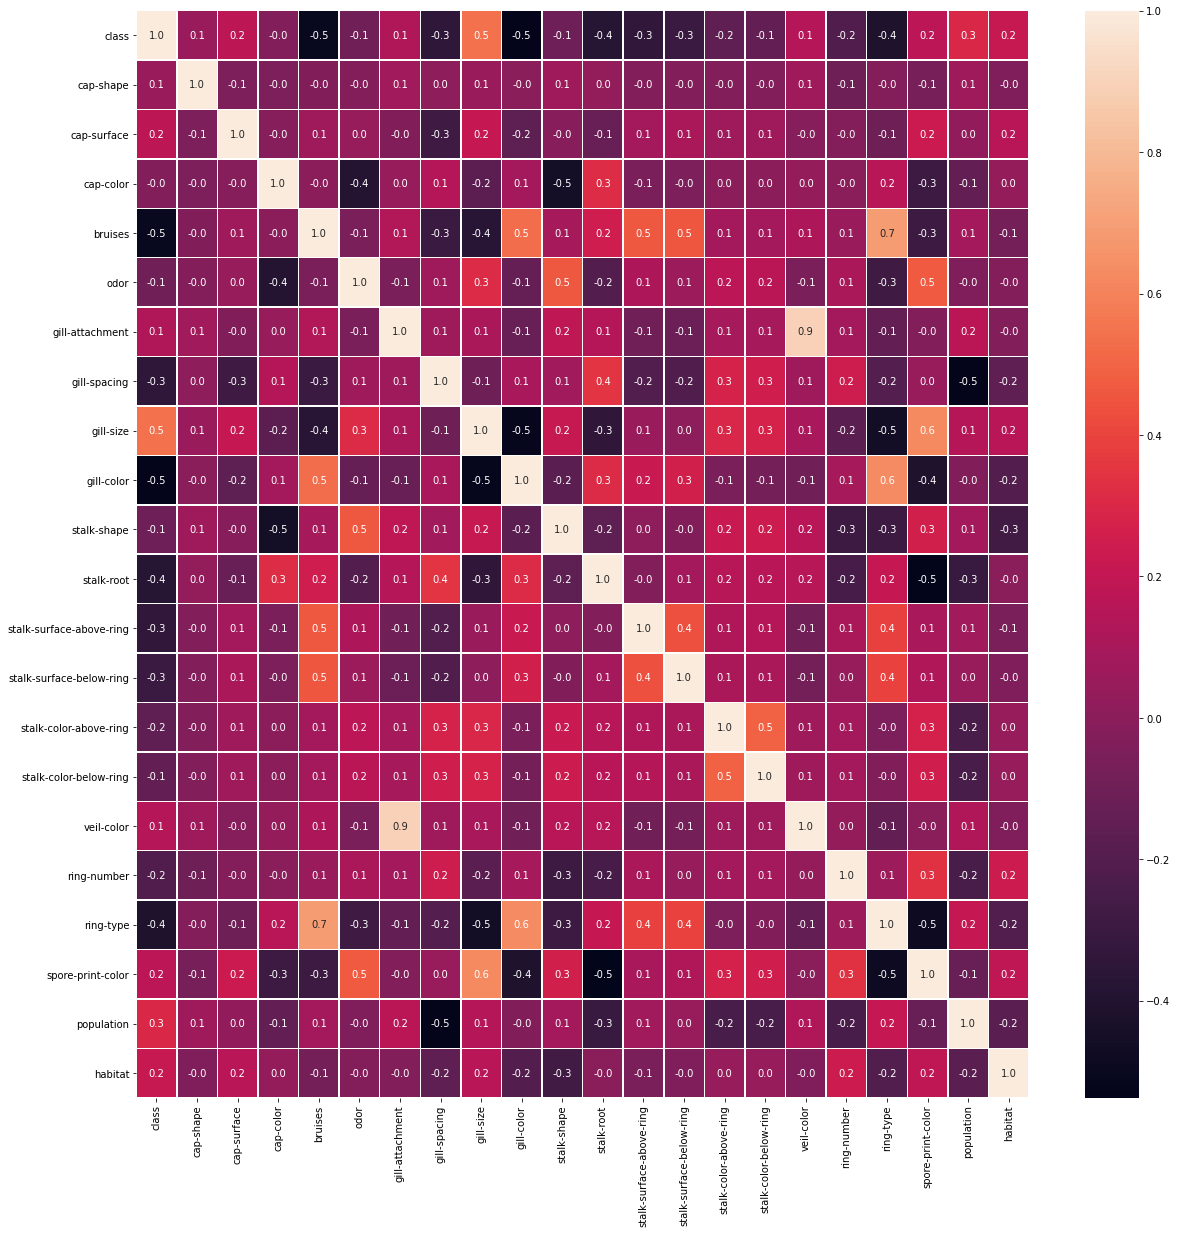

In [83]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(mushroom.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

here the feature as indicated are not present

#MODEL BUILDING AND TRAINING

In [84]:
X_train = mushroom.drop("class", axis=1)
Y_train = mushroom["class"]

1. here 'class'  is the target feature which extract from the dataframe 'mushroom' and stored it in Y_train
2. input features are stored at X_train by dropping target feature  from the dataframe 

In [85]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


this is the dataframe with input features 

In [86]:
Y_train

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

this is the extracted target feature

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

##LOGISTIC REGRESSION

here we want to creat a logistic regression model by using the above data

here we check the training accuracy 

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)


lr = LogisticRegression(max_iter=1000)
lr = lr.fit(x_train,y_train)#.fit for model training,.evalute for metrics,.predict for new y
act = accuracy_score(y_train,lr.predict(x_train))
print('Train Accuracy is: ',(act*100))


Train Accuracy is:  94.95251494899753


here we check the test accuracy

In [89]:
act1= accuracy_score(y_test,lr.predict(x_test))
print('Test Accuracy is: ',(act1*100))

Test Accuracy is:  95.36505332239541


##RANDOM FOREST

here we want to create a random forest model by using the above data

here we check the training accuracy

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 3, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features=0.5, 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
clr_rf = clf_rf.fit(x_train,y_train)
act = accuracy_score(y_train,clf_rf.predict(x_train))
print('Train Accuracy is: ',(act*100))

Train Accuracy is:  100.0


here we check the test accuracy

In [91]:
clr_rf = clf_rf.fit(x_test,y_test)
act1 = accuracy_score(y_test,clf_rf.predict(x_test))
print('Test Accuracy is: ',(act1*100))

Test Accuracy is:  100.0


##DECESSION TREE 

here we want to create a decesion tree model by using the above data

here we check the training accuracy

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
train_acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print('Train Accuracy is: ',(train_acc_decision_tree))

Train Accuracy is:  100.0


here we check the test accuracy

In [93]:
decision_tree.fit(x_test, y_test)
train_acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
print('Test Accuracy is: ',(train_acc_decision_tree))

Test Accuracy is:  100.0


#CONCLUSSION

As the accuracy of training and testing is more for RANDOM FOREST and DECESSION TREE model than LOGISTIC REGRESSION model so those are better for use